In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# 1. SPY estimate return using Garch(1,1)

In [2]:
spy_data = pd.read_csv('C:/Users/sherryyang/Desktop/Risk/SPY.csv')

In [3]:
#daily_return = 100*spy_data['Adj Close'].pct_change(1).dropna()

In [4]:
daily_return = spy_data['Adj Close'].pct_change(1).dropna()

In [5]:
#Normalize the daily return
daily_return = (daily_return-daily_return.mean())/daily_return.std()

In [7]:
# Garch(1,1) with gaussian distribution
from arch import arch_model
garch11 = arch_model(daily_return, p=1, q=1,dist='Normal')


res = garch11.fit()
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2765.6024538299207
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2760.7942197443886
Iteration:      3,   Func. Count:     28,   Neg. LLF: 2760.727002105293
Iteration:      4,   Func. Count:     35,   Neg. LLF: 2757.071615341218
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2756.0464530618124
Iteration:      6,   Func. Count:     49,   Neg. LLF: 2754.0296291018394
Iteration:      7,   Func. Count:     57,   Neg. LLF: 2754.0122541765445
Iteration:      8,   Func. Count:     64,   Neg. LLF: 2753.4845475040097
Iteration:      9,   Func. Count:     70,   Neg. LLF: 2753.3961149238676
Iteration:     10,   Func. Count:     77,   Neg. LLF: 2753.3817176843186
Iteration:     11,   Func. Count:     83,   Neg. LLF: 2753.376438163478
Iteration:     12,   Func. Count:     89,   Neg. LLF: 2753.376290984079
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2753.3762909831084
            Iterat

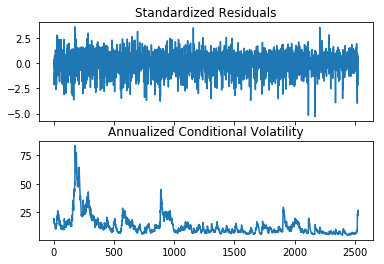

In [8]:
fig =res.plot(annualize='D')
plt.show()

In [9]:
# Garch(1,1) with student T distribution
from arch import arch_model

am = arch_model(daily_return, p=1, q=1,dist='StudentsT')
res1 = am.fit()
print(res1.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2704.279303505201
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2697.166343237524
Iteration:      3,   Func. Count:     28,   Neg. LLF: 2692.7779102442655
Iteration:      4,   Func. Count:     36,   Neg. LLF: 2690.2136399346036
Iteration:      5,   Func. Count:     44,   Neg. LLF: 2687.782529864422
Iteration:      6,   Func. Count:     52,   Neg. LLF: 2686.6554285216253
Iteration:      7,   Func. Count:     60,   Neg. LLF: 2684.674196878585
Iteration:      8,   Func. Count:     68,   Neg. LLF: 2683.411681315822
Iteration:      9,   Func. Count:     76,   Neg. LLF: 2682.9097372362085
Iteration:     10,   Func. Count:     83,   Neg. LLF: 2682.3871441331366
Iteration:     11,   Func. Count:     91,   Neg. LLF: 2681.816323248342
Iteration:     12,   Func. Count:     99,   Neg. LLF: 2681.5215460155887
Iteration:     13,   Func. Count:    106,   Neg. LLF: 2681.44416169645
Iteration:     14,   Func. Count:    113,   Neg. LLF: 2681.

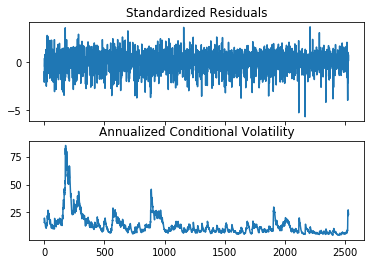

In [10]:
fig =res1.plot(annualize='D')
plt.show()

In [11]:
spy_data = spy_data.iloc[1:]

In [12]:
spy_data['return'] = daily_return

In [13]:
spy_data['Date'] =  pd.to_datetime(spy_data['Date'], format='%Y-%m-%d')

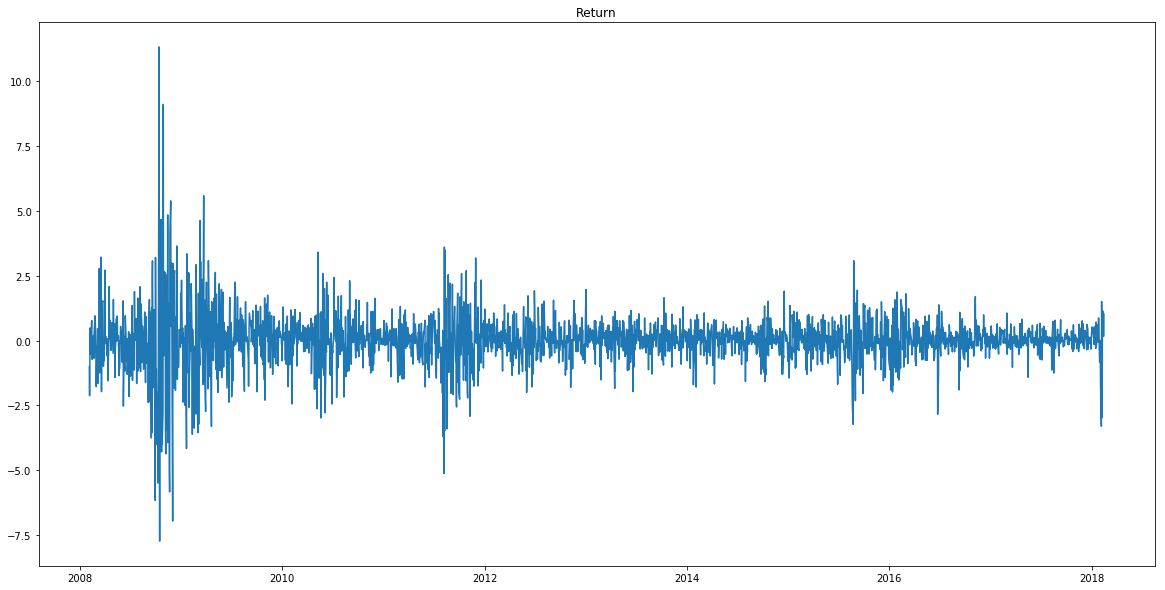

In [14]:
import datetime
plt.figure(figsize=(20, 10))
plt.plot(spy_data['Date'], spy_data['return'])
plt.title('Return')
plt.show()

# 2. Compare alpha with alpha =0.98

# According to the results I get, when I use Garch(1,1) with gaussian distribution, the alpha of volatility model is 0.8412, when I use Garch(1,1) with student t distribution, the alpha of volatility model is 0.8556, both are smaller than alpha =0.98, which means that the SPY stock return has shorter time window than that with alpha =0.98, and the SPY stock return account for fewer historical stock return data than that with alpha =0.98. It shows that SPY stock return is more sensitive to market than other stocks with alpha =0.98.

In [15]:
# fix the data with alpha = 0.98, garch(1,1) with gaussian distribution
fixed_res = garch11.fix([0.0812, 0.0227, 0.02, 0.98])

print(fixed_res.summary())

                         Constant Mean - GARCH Model Results                         
Dep. Variable:                     Adj Close   R-squared:                          --
Mean Model:                    Constant Mean   Adj. R-squared:                     --
Vol Model:                             GARCH   Log-Likelihood:               -3562.66
Distribution:                         Normal   AIC:                           7133.31
Method:            User-specified Parameters   BIC:                           7156.65
                                               No. Observations:                 2527
Date:                       Wed, Feb 14 2018                                         
Time:                               23:04:08                                         
      Mean Model     
                 coef
---------------------
mu             0.0812
   Volatility Model  
                 coef
---------------------
omega          0.0227
alpha[1]       0.0200
beta[1]        0.9800

Resul

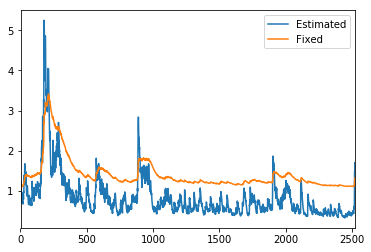

In [16]:
import pandas as pd
%matplotlib inline
df = pd.concat([res.conditional_volatility,fixed_res.conditional_volatility],1)
df.columns = ['Estimated', 'Fixed']
df.plot()
plt.show()